# **Import Modules n Data**

Module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data

In [2]:
filePath = 'data.csv'

In [3]:
df_raw = pd.read_csv(filePath)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LoanNumber             4999 non-null   int64  
 1   DateApproved           4999 non-null   object 
 2   BorrowerName           4998 non-null   object 
 3   Term                   4999 non-null   int64  
 4   InitialApprovalAmount  4999 non-null   float64
 5   F_Undisbursed          4999 non-null   int64  
 6   Channel                4999 non-null   object 
 7   Region                 4999 non-null   object 
 8   TypeOfCall             1999 non-null   object 
 9   InterestPerYear        4999 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 390.7+ KB


In [6]:
#Missing value in dataset
df_raw.isnull().sum()

LoanNumber                  0
DateApproved                0
BorrowerName                1
Term                        0
InitialApprovalAmount       0
F_Undisbursed               0
Channel                     0
Region                      0
TypeOfCall               3000
InterestPerYear             0
dtype: int64

In [18]:
df_raw['TypeOfCall'].describe()

count            1999
unique              3
top       NoBrandName
freq             1929
Name: TypeOfCall, dtype: object

In [16]:
df_raw.groupby('TypeOfCall')['LoanNumber'].count()

TypeOfCall
BrandName        51
Brandname        19
NoBrandName    1929
Name: LoanNumber, dtype: int64

In [7]:
df_raw.head()

,LoanNumber,DateApproved,BorrowerName,Term,InitialApprovalAmount,F_Undisbursed,Channel,Region,TypeOfCall,InterestPerYear
0,5120868804,4/17/2021,HOPE COMMUNITY RESOURCES INC.,60,7223025.0,1,TLS,South,BrandName,0.3
1,1305708310,1/16/2021,FOUNTAINHEAD DEVELOPMENT INC,60,2000000.0,1,TLS,South,BrandName,0.3
2,1528398702,3/27/2021,NORTHERN ENERGY SERVICES LLC,60,2000000.0,0,TLS,South,BrandName,0.1
3,2524238501,2/20/2021,ALCAN ELECTRICAL AND ENGINEERING INC,60,2000000.0,0,TLS,South,BrandName,0.1
4,3041178300,1/21/2021,FAMILY CENTERED SERVICES OF ALASKA INC,60,2000000.0,0,TLS,South,BrandName,0.1


In [8]:
df_raw[df_raw.isnull().any(axis=1)]

,LoanNumber,DateApproved,BorrowerName,Term,InitialApprovalAmount,F_Undisbursed,Channel,Region,TypeOfCall,InterestPerYear
848,7594268606,3/24/2021,NaN,60,156767.42,0,TLS,South,NoBrandName,0.10
1999,6255888300,1/26/2021,SAND DOLLAR LIFESTYLES LLC,60,345566.10,0,Sales Operator,Central,NaN,0.30
2000,2197498304,1/20/2021,RETAIL STOREFRONT GROUP INC,60,345372.50,0,Sales Operator,Central,NaN,0.30
2001,1246228307,1/16/2021,ELECTRIC MACHINE CONTROL INC,60,345367.00,0,Sales Operator,Central,NaN,0.30
2002,4312778507,2/25/2021,CHAPMAN CANOPY INC,60,345160.00,0,Sales Operator,Central,NaN,0.30
...,...,...,...,...,...,...,...,...,...,...
4994,5049278702,4/2/2021,ARKANSAS TRUCK CENTER INC,60,193027.50,0,Web,North,NaN,0.05
4995,6298258310,1/26/2021,CARNEY BATES & PULLIAM PLLC,60,192900.00,0,Web,North,NaN,0.05
4996,9257738309,1/30/2021,PATRICK AND ASHLEY FIELDS FAMILY DENTIST,60,192666.90,0,Web,North,NaN,0.05
4997,3522968302,1/22/2021,SLS TRUCKING INC.,60,192582.50,0,Web,North,NaN,0.05


# **Question 1**

In [19]:
df = df_raw.copy()
df.head()

,LoanNumber,DateApproved,BorrowerName,Term,InitialApprovalAmount,F_Undisbursed,Channel,Region,TypeOfCall,InterestPerYear
0,5120868804,4/17/2021,HOPE COMMUNITY RESOURCES INC.,60,7223025.0,1,TLS,South,BrandName,0.3
1,1305708310,1/16/2021,FOUNTAINHEAD DEVELOPMENT INC,60,2000000.0,1,TLS,South,BrandName,0.3
2,1528398702,3/27/2021,NORTHERN ENERGY SERVICES LLC,60,2000000.0,0,TLS,South,BrandName,0.1
3,2524238501,2/20/2021,ALCAN ELECTRICAL AND ENGINEERING INC,60,2000000.0,0,TLS,South,BrandName,0.1
4,3041178300,1/21/2021,FAMILY CENTERED SERVICES OF ALASKA INC,60,2000000.0,0,TLS,South,BrandName,0.1


In [20]:
#Total Initial Approval Amount
totalInitialApprovalAmount = df['InitialApprovalAmount'].sum()
print('Total Initial Approval Amount: ${:,.0f}'.format(totalInitialApprovalAmount))

Total Initial Approval Amount: $2,158,524,977


In [21]:
#Number of loan contracts
numberOfLoanContracts = df['LoanNumber'].count()
print('Number of loan contracts: {:,} contracts'.format(numberOfLoanContracts))

Number of loan contracts: 4,999 contracts


In [24]:
#Total Disbursed Amount
totalDisbursedAmount = df[df['F_Undisbursed']==0]['InitialApprovalAmount'].sum()
print('Total Disbursed Amount: ${:,.0f}'.format(totalDisbursedAmount))

Total Disbursed Amount: $1,930,881,375


In [25]:
#Total Disbursed Amount - double check
df_Disbursed = df.groupby('F_Undisbursed')['InitialApprovalAmount'].sum().reset_index()
df_Disbursed

,F_Undisbursed,InitialApprovalAmount
0,0,1.930881e+09
1,1,2.276436e+08


In [26]:
#Average Initial Amount per Loan Contract
averageInitialAmountPerLoanContract = df['InitialApprovalAmount'].mean()
print('Average Initial Amount per Loan Contract: ${:,.0f}'.format(averageInitialAmountPerLoanContract))

Average Initial Amount per Loan Contract: $431,791


In [41]:
#Average Interest Per Year of Loan Contract
totalInterestPerYear = df['InterestPerYear'] * df['InitialApprovalAmount']
averageInterestPerYear = totalInterestPerYear.sum() / df['InitialApprovalAmount'].sum()
print('Average Interest Per Year of Loan Contract: {:,.2f}%'.format(averageInterestPerYear*100))

Average Interest Per Year of Loan Contract: 14.49%


In [29]:
# % Disbursed Loan = Total Disbursed Amount / Total Initial Approval Amount
percentDisbursedLoan = totalDisbursedAmount / totalInitialApprovalAmount
print('Percent Disbursed Loan: {:,.2f}%'.format(percentDisbursedLoan*100))

Percent Disbursed Loan: 89.45%


# **Question 2**

In [30]:
#Visualize Number of loan contracts by Region
df_numberContracts = df.groupby('Region')['LoanNumber'].count().reset_index()
df_numberContracts

,Region,LoanNumber
0,Central,1603
1,North,1662
2,South,1734


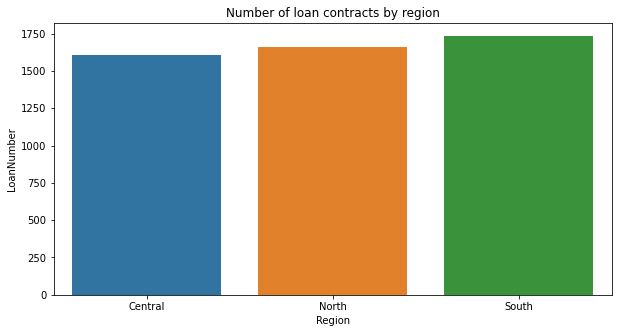

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(x='Region', y='LoanNumber', data=df_numberContracts)
plt.title('Number of loan contracts by region')
plt.show()

In [32]:
# Visualize Total Disbursed Amount by Region
df_totalDisbursedAmount = df[df['F_Undisbursed']==0].groupby('Region')['InitialApprovalAmount'].sum().reset_index()
df_totalDisbursedAmount

,Region,InitialApprovalAmount
0,Central,2.600722e+08
1,North,5.906408e+08
2,South,1.080168e+09


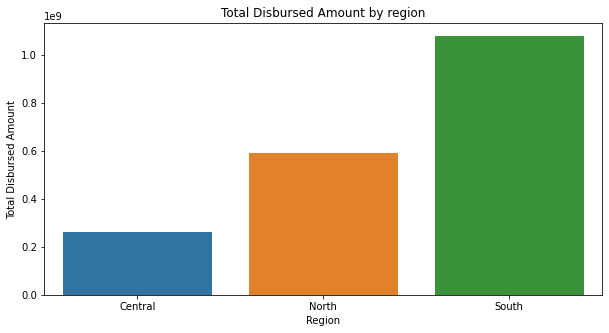

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(x='Region', y='InitialApprovalAmount', data=df_totalDisbursedAmount)
plt.title('Total Disbursed Amount by region')
plt.xlabel('Region')
plt.ylabel('Total Disbursed Amount')
plt.show()

In [35]:
# Visualize Average interest by Region
df_averageInterest = df.groupby('Region')['InterestPerYear'].mean().reset_index()
df_averageInterest

,Region,InterestPerYear
0,Central,0.186993
1,North,0.069826
2,South,0.166724


In [37]:
df_averageInterest['InterestPerYear'] = df_averageInterest['InterestPerYear'] * 100
df_averageInterest

,Region,InterestPerYear
0,Central,18.699314
1,North,6.982551
2,South,16.672434


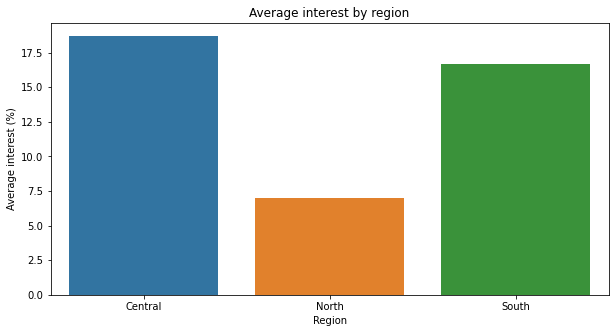

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(x='Region', y='InterestPerYear', data=df_averageInterest)
plt.title('Average interest by region')
plt.xlabel('Region')
plt.ylabel('Average interest (%)')
plt.show()

# **Question 3**

In [54]:
df_channel = df_raw.copy()
df_channel.head()

,LoanNumber,DateApproved,BorrowerName,Term,InitialApprovalAmount,F_Undisbursed,Channel,Region,TypeOfCall,InterestPerYear
0,5120868804,4/17/2021,HOPE COMMUNITY RESOURCES INC.,60,7223025.0,1,TLS,South,BrandName,0.3
1,1305708310,1/16/2021,FOUNTAINHEAD DEVELOPMENT INC,60,2000000.0,1,TLS,South,BrandName,0.3
2,1528398702,3/27/2021,NORTHERN ENERGY SERVICES LLC,60,2000000.0,0,TLS,South,BrandName,0.1
3,2524238501,2/20/2021,ALCAN ELECTRICAL AND ENGINEERING INC,60,2000000.0,0,TLS,South,BrandName,0.1
4,3041178300,1/21/2021,FAMILY CENTERED SERVICES OF ALASKA INC,60,2000000.0,0,TLS,South,BrandName,0.1


## **Question 3.1**

In [55]:
df_channel['DisbursedAmount'] = df_channel['InitialApprovalAmount'] * (1 - df_channel['F_Undisbursed'])
df_channel['InterestPerYearAmount'] = df_channel['InterestPerYear'] * df_channel['InitialApprovalAmount']

df_channel.head()

,LoanNumber,DateApproved,BorrowerName,Term,InitialApprovalAmount,F_Undisbursed,Channel,Region,TypeOfCall,InterestPerYear,DisbursedAmount,InterestPerYearAmount
0,5120868804,4/17/2021,HOPE COMMUNITY RESOURCES INC.,60,7223025.0,1,TLS,South,BrandName,0.3,0.0,2166907.5
1,1305708310,1/16/2021,FOUNTAINHEAD DEVELOPMENT INC,60,2000000.0,1,TLS,South,BrandName,0.3,0.0,600000.0
2,1528398702,3/27/2021,NORTHERN ENERGY SERVICES LLC,60,2000000.0,0,TLS,South,BrandName,0.1,2000000.0,200000.0
3,2524238501,2/20/2021,ALCAN ELECTRICAL AND ENGINEERING INC,60,2000000.0,0,TLS,South,BrandName,0.1,2000000.0,200000.0
4,3041178300,1/21/2021,FAMILY CENTERED SERVICES OF ALASKA INC,60,2000000.0,0,TLS,South,BrandName,0.1,2000000.0,200000.0


In [57]:
# Estimate perfomance of Channels
df_channelPerfomance = pd.pivot_table(df_channel, index='Channel', 
                            values=['LoanNumber', 'InitialApprovalAmount', 'F_Undisbursed', 'DisbursedAmount', 'InterestPerYearAmount'], 
                            aggfunc={'LoanNumber': 'count',
                                     'InitialApprovalAmount': 'sum',
                                     'F_Undisbursed': 'sum',
                                     'DisbursedAmount': 'sum',
                                     'InterestPerYearAmount': 'sum'}).reset_index()
df_channelPerfomance

,Channel,DisbursedAmount,F_Undisbursed,InitialApprovalAmount,InterestPerYearAmount,LoanNumber
0,App,4.661619e+08,49,4.742776e+08,2.470087e+07,1000
1,Sales Operator,2.553749e+08,314,3.520220e+08,4.352203e+07,1501
2,TLS,1.203456e+09,2,1.212679e+09,2.158401e+08,1999
3,Web,5.888599e+06,473,1.195463e+08,2.870887e+07,499


In [58]:
#rename columns
df_channelPerfomance.rename(columns={'LoanNumber': 'NumberOfLoanContracts', 
                                     'F_Undisbursed': 'NumberOfUndisbursedContracts'}, inplace=True)
df_channelPerfomance

,Channel,DisbursedAmount,NumberOfUndisbursedContracts,InitialApprovalAmount,InterestPerYearAmount,NumberOfLoanContracts
0,App,4.661619e+08,49,4.742776e+08,2.470087e+07,1000
1,Sales Operator,2.553749e+08,314,3.520220e+08,4.352203e+07,1501
2,TLS,1.203456e+09,2,1.212679e+09,2.158401e+08,1999
3,Web,5.888599e+06,473,1.195463e+08,2.870887e+07,499


In [59]:
df_channelPerfomance['AverageInitialAmountPerLoanContract'] = df_channelPerfomance['InitialApprovalAmount'] / df_channelPerfomance['NumberOfLoanContracts']
df_channelPerfomance['AverageInterestPerYear'] = df_channelPerfomance['InterestPerYearAmount'] / df_channelPerfomance['InitialApprovalAmount']
df_channelPerfomance['PercentUndisbursedLoan'] = df_channelPerfomance['NumberOfUndisbursedContracts'] / df_channelPerfomance['NumberOfLoanContracts']
df_channelPerfomance

,Channel,DisbursedAmount,NumberOfUndisbursedContracts,InitialApprovalAmount,InterestPerYearAmount,NumberOfLoanContracts,AverageInitialAmountPerLoanContract,AverageInterestPerYear,PercentUndisbursedLoan
0,App,4.661619e+08,49,4.742776e+08,2.470087e+07,1000,474277.624160,0.052081,0.049000
1,Sales Operator,2.553749e+08,314,3.520220e+08,4.352203e+07,1501,234524.985230,0.123634,0.209194
2,TLS,1.203456e+09,2,1.212679e+09,2.158401e+08,1999,606642.825353,0.177986,0.001001
3,Web,5.888599e+06,473,1.195463e+08,2.870887e+07,499,239571.826994,0.240148,0.947896


## **Question 3.2**

In [64]:
df_TLS = df_raw[df_raw['Channel']=='TLS']
df_TLS.head()

,LoanNumber,DateApproved,BorrowerName,Term,InitialApprovalAmount,F_Undisbursed,Channel,Region,TypeOfCall,InterestPerYear
0,5120868804,4/17/2021,HOPE COMMUNITY RESOURCES INC.,60,7223025.0,1,TLS,South,BrandName,0.3
1,1305708310,1/16/2021,FOUNTAINHEAD DEVELOPMENT INC,60,2000000.0,1,TLS,South,BrandName,0.3
2,1528398702,3/27/2021,NORTHERN ENERGY SERVICES LLC,60,2000000.0,0,TLS,South,BrandName,0.1
3,2524238501,2/20/2021,ALCAN ELECTRICAL AND ENGINEERING INC,60,2000000.0,0,TLS,South,BrandName,0.1
4,3041178300,1/21/2021,FAMILY CENTERED SERVICES OF ALASKA INC,60,2000000.0,0,TLS,South,BrandName,0.1


In [65]:
df_TLS['TypeOfCall'].unique()

array(['BrandName', 'NoBrandName', 'Brandname'], dtype=object)

In [66]:
# Fill missing value in TypeOfCall column
df_TLS['TypeOfCall'].fillna('Unknown', inplace=True)
df_TLS['TypeOfCall'].unique()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20820\668578754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TLS['TypeOfCall'].fillna('Unknown', inplace=True)


array(['BrandName', 'NoBrandName', 'Brandname'], dtype=object)

In [67]:
df_TLS['TypeOfCall'] = df_TLS['TypeOfCall'].apply(lambda x: 'BrandName' if x=='Brandname' else x)
df_TLS['TypeOfCall'].unique()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20820\2738264683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TLS['TypeOfCall'] = df_TLS['TypeOfCall'].apply(lambda x: 'BrandName' if x=='Brandname' else x)


array(['BrandName', 'NoBrandName'], dtype=object)

In [69]:
df_TLS['TelecomCost'] = df_TLS['TypeOfCall'].apply(lambda x: 0.2 if x=='BrandName' else (0.1 if x=='NoBrandName' else 0.0))
df_TLS.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20820\4193923946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TLS['TelecomCost'] = df_TLS['TypeOfCall'].apply(lambda x: 0.2 if x=='BrandName' else (0.1 if x=='NoBrandName' else 0.0))


,LoanNumber,DateApproved,BorrowerName,Term,InitialApprovalAmount,F_Undisbursed,Channel,Region,TypeOfCall,InterestPerYear,TelecomCost
0,5120868804,4/17/2021,HOPE COMMUNITY RESOURCES INC.,60,7223025.0,1,TLS,South,BrandName,0.3,0.2
1,1305708310,1/16/2021,FOUNTAINHEAD DEVELOPMENT INC,60,2000000.0,1,TLS,South,BrandName,0.3,0.2
2,1528398702,3/27/2021,NORTHERN ENERGY SERVICES LLC,60,2000000.0,0,TLS,South,BrandName,0.1,0.2
3,2524238501,2/20/2021,ALCAN ELECTRICAL AND ENGINEERING INC,60,2000000.0,0,TLS,South,BrandName,0.1,0.2
4,3041178300,1/21/2021,FAMILY CENTERED SERVICES OF ALASKA INC,60,2000000.0,0,TLS,South,BrandName,0.1,0.2


In [70]:
#total cost of TLS channel
totalCostOfTLSChannel = df_TLS['TelecomCost'].sum()
print('Total cost of TLS channel: ${:,.0f}'.format(totalCostOfTLSChannel))

Total cost of TLS channel: $207


## **Question 3.3**

In [71]:
df.head()

,LoanNumber,DateApproved,BorrowerName,Term,InitialApprovalAmount,F_Undisbursed,Channel,Region,TypeOfCall,InterestPerYear
0,5120868804,4/17/2021,HOPE COMMUNITY RESOURCES INC.,60,7223025.0,1,TLS,South,BrandName,0.3
1,1305708310,1/16/2021,FOUNTAINHEAD DEVELOPMENT INC,60,2000000.0,1,TLS,South,BrandName,0.3
2,1528398702,3/27/2021,NORTHERN ENERGY SERVICES LLC,60,2000000.0,0,TLS,South,BrandName,0.1
3,2524238501,2/20/2021,ALCAN ELECTRICAL AND ENGINEERING INC,60,2000000.0,0,TLS,South,BrandName,0.1
4,3041178300,1/21/2021,FAMILY CENTERED SERVICES OF ALASKA INC,60,2000000.0,0,TLS,South,BrandName,0.1


In [72]:
df_BrandNameStatus = df[['LoanNumber', 'F_Undisbursed', 'Channel', 'TypeOfCall']]
df_BrandNameStatus.head()

,LoanNumber,F_Undisbursed,Channel,TypeOfCall
0,5120868804,1,TLS,BrandName
1,1305708310,1,TLS,BrandName
2,1528398702,0,TLS,BrandName
3,2524238501,0,TLS,BrandName
4,3041178300,0,TLS,BrandName


In [73]:
df_BrandNameStatus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LoanNumber     4999 non-null   int64 
 1   F_Undisbursed  4999 non-null   int64 
 2   Channel        4999 non-null   object
 3   TypeOfCall     1999 non-null   object
dtypes: int64(2), object(2)
memory usage: 156.3+ KB


In [74]:
df_BrandNameStatus['TypeOfCall'].unique()

array(['BrandName', 'NoBrandName', 'Brandname', nan], dtype=object)

In [75]:
df_BrandNameStatus.fillna('Unknown', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20820\2626389582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BrandNameStatus.fillna('Unknown', inplace=True)


In [76]:
df_BrandNameStatus['TypeOfCall'] = df_BrandNameStatus['TypeOfCall'].apply(lambda x: 'BrandName' if x=='Brandname' else x)
df_BrandNameStatus['TypeOfCall'].unique()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20820\806702666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BrandNameStatus['TypeOfCall'] = df_BrandNameStatus['TypeOfCall'].apply(lambda x: 'BrandName' if x=='Brandname' else x)


array(['BrandName', 'NoBrandName', 'Unknown'], dtype=object)

In [77]:
df_BrandNameStatusStatement = pd.pivot_table(df_BrandNameStatus, 
                                             index=['Channel', 'TypeOfCall'],
                                            columns=['F_Undisbursed'],
                                            values=['LoanNumber'],
                                            aggfunc='count').reset_index()
df_BrandNameStatusStatement

Channel   TypeOfCall LoanNumber       
F_Undisbursed                                       0      1
0                         App      Unknown      951.0   49.0
1              Sales Operator      Unknown     1187.0  314.0
2                         TLS    BrandName       68.0    2.0
3                         TLS  NoBrandName     1929.0    NaN
4                         Web      Unknown       26.0  473.0